# 지도학습 - 분류
#### 자주 사용하는 사이킷런 모듈
- sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
- sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
- sklearn.svm: Support Vector Machines (SVM)
- sklearn.tree: 의사결정나무(Decision Trees)
- sklearn.neighbors : K-최근접이웃모델 (KNeighbors)

#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공  

# import library

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 모델 알고리즘
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 데이터 셋
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 검증
from sklearn.metrics import accuracy_score


## Data Load
- iris data
    - 꽃의 특성 (feature) 데이터 
        - [‘sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, ‘petal width (cm)’]    
            - sepal: 꽃받침 / petal: 꽃잎
    - target(y)는 세 가지의 꽃의 종류
        - 0: Setosa, 1: Versicolor, 2: Virginica
              

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### data & target

In [3]:
data = iris_df.iloc[:,:-1]
target = iris_df['target']

### train & test data 분리 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 22)

In [5]:
X_train.shape

(120, 4)

# 의사결정나무 (Decision Tree) 

### 모델 객체화

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 111, criterion = 'entropy')

- 내가 설정한 대로 성능이 바뀌는 것을 하이퍼 파라미터라고 한다. (max_depth , n_estimators ... ) 

### 모델 학습

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=111)

- 머신러닝의 3단계
    - 1) 모델의 객체화 
    - 2) 모델 학습
    - 3) 모델 적용 (예측 & 분류)

- sklearn에서 제공하는 Decision Tree 순수도의 척도는 엔트로피 외에도 지니 지수가 있다. (기본값이 gini이기에 criterion을 정해주지 않으면 지니 지수로 순수도를 계산하게 된다.) 

- criterion 외에도 의사결정나무에는 수 많은 하이퍼 파라미터가 존재한다. 하이퍼 파라미터를 튜닝하는 것 자체로도 성능이 향상될 수 있다. 

### 모델 평가

In [8]:
from sklearn.metrics import accuracy_score, classification_report

pred = dt.predict(X_test)
accuracy_score(pred, y_test)
# dt.score(X = X_test, y = y_test)
# print(classification_report(y_test, pred))

0.8666666666666667

### 시각화

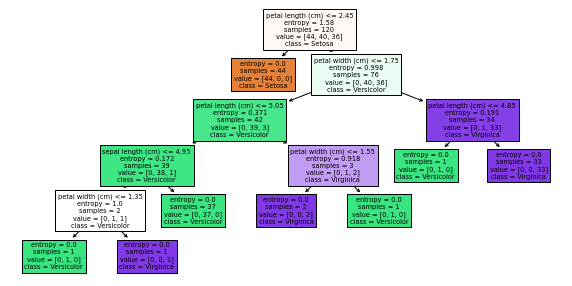

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(dt, filled=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=X_train.columns)
plt.show()

- plottree : decision tree를 graph로 시각화 해주는 패키지 
    - filled :  그래프의 class별로 색의 차이를 둠. (엔트로피 별 농도 차이 존재) 

-  마지막 노드에서 entropy 0.0을 출력한다. 이는 완벽하게 분리시켰다고 말할 수 도 있지만, 사실 억지로 분류시킨 것에 가깝다. 그렇기에 과적합(Overfitting)발생 의심. 

## 가지치기 

- max_depth를 이용하여 최대 깊이를 조절한다. (가지치기) 

In [ ]:
dt_pruning = DecisionTreeClassifier(random_state= 2022, max_depth = 3)

In [ ]:
dt_pruning.fit(X_train, y_train)

In [ ]:
# dt_pruning.score(X = X_test, y = y_test)
pred = dt_pruning.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(dt_pruning, filled=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=X_train.columns)
plt.show()

- depth가 1일 경우 정확도가 확 낮아진다. 이처럼 depth가 무조건 작다고 좋은 것은 아님. 최적의 depth를 구해내야함. 

- iris 데이터셋의 경우 데이터의 양도 적고 애초에 depth가 깊지 않기 때문에 정확도의 차이가 발생하지 않는다. 

- iris 데이터 외에도 다른 데이터 셋을 이용하여 max_depth를 조절해보길 바란다. 
 

# SVM

- 분류 : SVC
- 회귀 : SVR

### 데이터 분할

In [ ]:
X_train = iris_df.iloc[:, :2]
y_train = iris_df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)

### 2차원

##### kernel = 'linear'

###### C = 0.1, 1, 1000

In [ ]:
from sklearn import svm

svm_01 = svm.SVC(kernel = 'linear', C = 0.1)
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_1 = svm.SVC(kernel = 'linear', C= 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_1000 = svm.SVC(kernel = 'linear', C= 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

## 시각화

In [ ]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [ ]:
print(xx,yy)
print(xx.shape, yy.shape)
# 격자의 좌표 

- meshgrid : 직사각형의 그리드 (격자) 안에 배치 될 수 있도록 하는 함수
- x_min-1 ~ x_max+1 / y_min-1 ~ y_max+1 사이에서 0.25 간격마다 그리드(격자) 생성

In [ ]:
plt.figure(figsize = (5,15))
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_1,alpha=0.5)
# plt.pcolormesh() : 2D스타일의 색상 플롯 생성, alpha = 색상의 농도
plt.show()

In [ ]:
plt.figure(figsize = (5,15))

# C = 0.1

# 초평면을 만드는 과정
# np.c_[] : 같은 크기의 두 배열을 가로방향(왼쪽 -> 오른쪽)으로 합쳐줌
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

- C가 클수록 hardmargin (초평면이 빡빡하게 형성)

##### kernel = 'polynomial'

###### C = 0.001, 1, 1000

In [ ]:
svm_0001 = svm.SVC(kernel = 'poly', C = 0.001)
svm_0001.fit(X_train, y_train)
pred = svm_0001.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_1 = svm.SVC(kernel = 'poly', C = 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_1000 = svm.SVC(kernel = 'poly', C = 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [ ]:
plt.figure(figsize = (5,15))

# C = 0.001
z_0001=svm_0001.predict(np.c_[xx.ravel(), yy.ravel()])
z_0001=z_0001.reshape(xx.shape)
ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_0001,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.001')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

##### C에 따른 정확도 

In [ ]:
C = [0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy = []
from sklearn import svm
for c in C:
    svm_c = svm.SVC(kernel = 'poly', C = c)
    svm_c.fit(X_train, y_train)
    pred = svm_c.predict(X_test)
    scores = accuracy_score(pred, y_test)
    accuracy.append(scores)
    
plt.plot(C, accuracy)
plt.xlabel('C')
plt.xlim(-100, 10000)
plt.ylabel('accuracy')
plt.show()

### kernel = 'rbf'

###### C =  0.1, 1, 100 
###### gamma = 1, 10 , 100

In [ ]:
svm1_1 = svm.SVC(kernel = 'rbf', C =1 , gamma = 1)
svm1_1.fit(X_train, y_train)
pred = svm1_1.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm1_10 = svm.SVC(kernel = 'rbf', C =1, gamma = 10)
svm1_10.fit(X_train, y_train)
pred = svm1_10.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm1_100 = svm.SVC(kernel = 'rbf', C =1, gamma = 100)
svm1_100.fit(X_train, y_train)
pred = svm1_100.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_01 = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 'auto')
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_1 = svm.SVC(kernel = 'rbf', C = 1, gamma = 'auto')
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
svm_100 = svm.SVC(kernel = 'rbf', C = 100, gamma = 'auto')
svm_100.fit(X_train, y_train)
pred = svm_100.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [ ]:
plt.figure(figsize = (10,15))

# C = 1, gamma = 1 
z_1_1=svm1_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_1=z_1_1.reshape(xx.shape)
ax1 = plt.subplot(3,2,1)
plt.pcolormesh(xx,yy,z_1_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=1')

# C = 1, gamma = 10
z_1_10=svm1_10.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_10=z_1_10.reshape(xx.shape)
ax2 = plt.subplot(3,2,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_10,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=10')

# C = 1, gamma = 1000
z_1_100=svm1_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_100=z_1_100.reshape(xx.shape)
ax3 = plt.subplot(3,2,5, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=100')

# C = 0.1
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)
ax4 = plt.subplot(3,2,2, sharey = ax1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax5 = plt.subplot(3,2,4, sharey = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 100
z_100=svm_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_100=z_100.reshape(xx.shape)
ax6 = plt.subplot(3,2,6, sharey = ax1)
plt.pcolormesh(xx,yy,z_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=100')

plt.show()

### 4차원 ( 시각화 불가능 )

In [ ]:
data=iris_df.iloc[:, :-1]
target=iris_df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 111)

In [ ]:
svm_linear = svm.SVC(kernel = 'linear', C = 1)
svm_linear.fit(X_train, y_train)
pred = svm_linear.predict(X_test)
accuracy_score(pred, y_test)

- 2차원일 때 같은 조건 하 정확도가 0.8 

In [ ]:
svm_poly = svm.SVC(kernel = 'poly', C = 1)
svm_poly.fit(X_train, y_train)
pred = svm_poly.predict(X_test)
accuracy_score(pred, y_test)

- kernel 이나 C 같은 하이퍼파라미터는 튜닝을 거쳐 가장 좋은 성능을 띄는 모델을 찾아야 함 -> 하이퍼파라미터 튜닝

# KNN

- iris 데이터의 경우 feature의 단위가 cm로 통일되어 있기 때문에 유방암 진단 데이터셋 이용

### 유방암 진단 데이터 

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

breast_cancer_df = pd.DataFrame(data = breast_cancer_data.data, columns = breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target

data = breast_cancer_df.iloc[:,:-1]
target = breast_cancer_df['target']

In [ ]:
data

In [ ]:
target

In [ ]:
data.iloc[:,3:10].describe()
# mean area 과 다른 column 들의 max, min, mean 등 차이 큰 것 확인 

- 음성 / 양성 구분짓는 이진분류

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 111)

### 분류 정확도

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
accuracy_score(pred, y_test)




### 정규화, 표준화

##### 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

scaler = StandardScaler()

cols = X_train.columns

X_train_standard[cols] = scaler.fit_transform(X_train_standard[cols]) 
X_test_standard[cols] = scaler.transform(X_test_standard[cols])


In [ ]:
print(X_train.iloc[5,:5].head()) 
print(X_train_standard.iloc[5,:5].head())

In [ ]:
print(X_train.iloc[5,:5].describe())
print(X_train_standard.iloc[5,:5].describe())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_standard, y_train)

pred = knn.predict(X_test_standard)
accuracy_score(pred, y_test)


- 정규화 거치지 않았을 경우 0.93

### 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

scaler = MinMaxScaler()

cols = X_train.columns

X_train_minmax[cols] = scaler.fit_transform(X_train_minmax[cols])
X_test_minmax[cols] = scaler.transform(X_test_minmax[cols])

In [ ]:
print(X_train_minmax.iloc[5,:5].head())
print(X_train_minmax.iloc[:,:5].describe())

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_minmax, y_train)
 
pred = knn.predict(X_test_minmax)

accuracy_score(pred, y_test)

- 정규화 거치기 이전 0.93

### k 변화에 의한 accuracy 변화

In [ ]:
k_list = range(1,101)
accuracy = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_minmax, y_train)
    pred = knn.predict(X_test_minmax)
    score = accuracy_score(pred, y_test)
    accuracy.append(score)
    
plt.plot(k_list, accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()

- K가 커질수록 정확도가 하락한든 우하향 그래프
- 적정한 K를 구해야함 (하이퍼파라미터 튜닝) 

- 지금까지 설명드린 모델들은 간단한 분류를 위한 모델일 뿐입니다. 어떤 모델이 더 효과가 좋은지, 어떤 특성의 데이터에 어떤 모델을 써야하는 지와 하이퍼파라미터 튜닝하는 과정은 직접 프로젝트나 실습을 통해 비교해보고, 경험해보는 방향을 거치시는게 좋습니다. 

# 지도학습(분류) 과제

### SVC, 의사결정나무, KNN을 모델만 변경해서 분류 보고서를 출력해주세요. - 80점

In [ ]:
import pandas as pd

# SVC 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# 데이터 불러오기 
# breast_cancer 데이터 사용합니다. 

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

In [ ]:
# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

print(data)
print(target)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)

In [ ]:
# SVM 모델 생성
model = SVC(kernel='____', C=____, gamma=____)

In [ ]:
# 모델 훈련
model.____(X_train, y_train)

In [ ]:
# 예측
y_pred = model.____(X_test)

In [ ]:
# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

### 최종 제출은 아래와 같이 classfication_report만 도출되도록 해주시면 됩니다. 

### svc

In [ ]:
# SVC 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 불러오기 
# breast_cancer 데이터 사용합니다. 

breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)

# SVM 모델 생성
model = SVC(kernel='____', C=____, gamma=____)

# 모델 훈련
model.____(X_train, y_train)

# 예측
y_pred = model.____(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)


### knn

In [ ]:
# knn 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)




# 이전 부분은 동일하니 위에서 복붙하셔도 됩니다. 




############################################################

# KNN 모델 생성
model = ____(*hyperparameter)

# 모델 훈련
model.____(X_train, y_train)

# 예측
y_pred = model.____(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)

### decision tree

In [ ]:
# decision tree 불러오기 
from sklearn.___ import ___
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data = ______, columns = ________)

# target 설정
breast_cancer_df['target'] = ________

data = breast_cancer_df.iloc[__,___]
target = breast_cancer_df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(____, _____, test_size=0.2, random_state=42)



# 이전 부분은 동일하니 위에서 복붙하셔도 됩니다. 



############################################################

# decision tree 모델 생성 (decision tree의 경우에 실습 영상에 나온 것 보다 많은 하이퍼파라미터가 있으니 궁금하신 분들은 구글에 검색해보시는 것을 추천드립니다.)
model = ____(*hyperparameter)

# 모델 훈련
model.____(X_train, y_train)

# 예측
y_pred = model.____(X_test)

# 분류 보고서 출력 (분석 보고서 출력을 하는 코드는 classification_report입니다.)
report = classification_report(y_test, y_pred)
print(report)


### 추가로 다른 분류 기법 검색 후에 분류 보고서 제출하시면 추가점수 드리겠습니다. - 20점  (RandomForest -10점, Gradient Boosting - 10점)
- 모델을 적용하는 과정은 다 똑같으시니 랜덤포레스트, 그레디언트부스팅을 구글에 검색 후 
    - 1. 라이브러리 이름
    - 2. 모델 이름
    - 3. 하이퍼파라미터 
- 세 가지 종류를 확인해주시며 됩니다. 